#### Identify and delete the Columns That Contain a Single Value

- Columns that have a single observation or value are probably useless for modeling. 
- These columns or predictors are referred to **zero-variance predictors** as if we measured the variance (average value from the mean), it would be zero.


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('./data/oil-spill.csv', header=None)

# print the shape of the dataset
print("\n*******Shape of the dataset: ******", df.shape)

#Identify how many unique values each column has
print(df.nunique())

# Identify zero-variance predictors
zero_var_cols = df.columns[df.nunique() == 1]

# Print the zero-variance predictors, only 22nd column is a zero-variance predictor 
print(" \n*******Zero-variance predictors: ******", zero_var_cols)

# get number of unique values for each column 
counts = df.nunique()

# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]

print("\n*******Columns to delete: ******", to_del)

# drop the zero-variance predictors
df.drop(to_del, axis=1, inplace=True)

print("\n*******Number of columns after removing zero-variance predictors: ******", df.shape)


*******Shape of the dataset: ****** (937, 50)
0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64
 
*******Zero-variance predictors: ****** Index([22], dtype='int64')

*******Columns to delete: ****** [22]

*******Number of columns after removing zero-variance predictors: ****** (937, 49)


#### Columns That Have Very Few Values
- There are columns in the dataset, which had very few unique values.
- This might make sense for ordinal or categorical variables. But this doesn't make sense for continuous/numeric variables.
- These columns are referred to **low-variance predictors** or **near-zero variance predictors** as if we measured the variance (average value from the mean), it would be very low.

- These columns may or may not contribute to the skill of a model. **We can’t assume that**
they are useless to modeling.
- Although near-zero variance predictors likely contain little valuable predictive infor- mation, we may not desire to filter these out.

- In below example, We found that there are 11 columns which has very low variance.
- This does not mean that these rows and columns should be deleted, but they require further attention.
    - **Perhaps the unique values can be encoded as ordinal values?**
    - **Perhaps the unique values can be encoded as categorical values?**


In [10]:
# summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('./data/oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
	num = len(unique(data[:, i]))
	percentage = float(num) / data.shape[0] * 100
	if percentage < 1:
		print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


In [ ]:
#Using oandas to fidn the unique value in the column
df = pd.read_csv('./data/iris.csv', header=None)

# 1️⃣ Raw counts of each unique value in the 'species' column
counts = df[4].value_counts()
print("Raw counts:")
print(counts)

# 2️⃣ Normalized counts – i.e., percentage of each class
percentages = df[4].value_counts(normalize=True) * 100
print("\nPercentage of each species:")
print(percentages.round(2))

Raw counts:
4
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Percentage of each species:
4
Iris-setosa        33.33
Iris-versicolor    33.33
Iris-virginica     33.33
Name: proportion, dtype: float64


In [15]:
# In some cases we may need to delete the columns that have very few values.

# delete columns where number of unique values is less than 1% of the rows
from pandas import read_csv
# load the dataset
df = read_csv('./data/oil-spill.csv', header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


#### Remove Columns That Have A Low Variance
- We can identify the columns that have a low variance by using statistical method variance.
- The variance is a statistic calculated on a variable as the average squared difference of values in the sample from the mean.

- A low variance means that the values in the column are close to the mean, and a high variance means that the values in the column are spread out.

- The variance can be used as a filter for identifying columns to be removed from the dataset. A column that has a single value has a variance of 0.0, and a column that has very few unique values may have a small variance.

- The **VarianceThreshold** class from the scikit-learn library supports this as a type of feature selection.
- An instance of the class can be created and we can specify the threshold argument, **which defaults to 0.0 to remove columns with a single value.**
- It can then be fit and applied to a dataset by calling the fit transform() function to create a transformed version of the dataset where the columns that have a variance lower than the threshold have been removed automatically.

In [1]:
# example of applying the variance threshold for feature selection
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
# load the dataset
df = read_csv('./data/oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold(). # Default variance threshold is 0, we can chnage this value
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


##### Use threshold parameter to VarianceThreshold class. 

(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


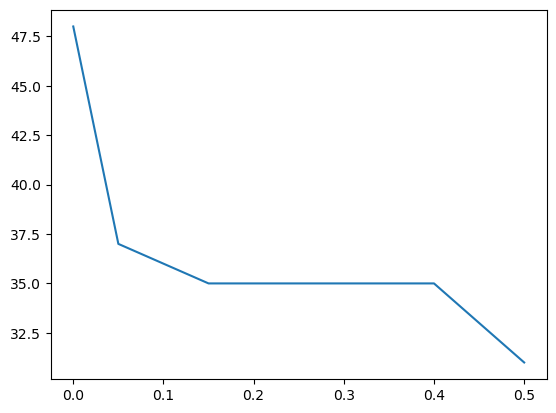

In [3]:
# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
# load the dataset
df = read_csv('./data/oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05) # Create a list of value to be used as threshold
# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

### Identify And Delete Rows That Contain Duplicate Data
- Rows that have identical data are could be useless to the modeling process, sometime misleading during model evaluation.
- Here, a duplicate row is a row where each value in each column for that row appears in identically the same order (same column values) in another row.

- For example, if you are using a train/test split or k-fold cross-validation, then it is possible for a duplicate row or rows to appear in both train and test datasets and any evaluation of the model on these rows will be (or should be) correct. This will result in an optimistically biased estimate of performance on unseen data.

- **Data deduplication**, also known as **duplicate detection**, **record linkage**, **record match- ing**, or **entity resolution**, refers to the process of identifying tuples in one or more relations that refer to the same real-world entity.



In [4]:
# delete rows of duplicate data from the dataset
from pandas import read_csv
# load the dataset
df = read_csv('./data/iris.csv', header=None)
print(df.shape)

# calculate duplicates
dups = df.duplicated()

# report if there are any duplicates
print(dups.any())

# list all duplicate rows
print(df[dups])

# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(150, 5)
True
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica
(147, 5)
